In [34]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matrix_factorization_utilities
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

#read data from excel
dataset = pd.read_excel("data.xlsx", sheet_name="Sheet")

#FILLING MISSING VALUE (MATRIX FACTORIZATION METHOD)
#select the ratings from the dataset 
r=dataset.iloc[:,18:22]
#renaming the columns
r.columns=['1','2','3','4']
#renaming the rows
r.rows=['user_id']
# change to float data type
r.as_matrix().astype(float)
# Apply matrix factorization to find the latent features
U, M = matrix_factorization_utilities.low_rank_matrix_factorization(r.as_matrix().astype(float),
                                                                    num_features=15,
                                                                    regularization_amount=0.1)

# Find all predicted ratings by multiplying the U by M
predicted_ratings = np.matmul(U, M)

# Save all the ratings to a csv file
predicted_ratings_df = pd.DataFrame(index=r.index,
                                    columns=r.columns,
                                    data=predicted_ratings)

#Replace the missing data values with filled data using matrix factorization
del dataset['F.R.I.E.N.D.S']
del dataset['Game Of Thrones']
del dataset['Big Bang Theory']
del dataset['Silicon Valley']
dataset['F.R.I.E.N.D.S'] = predicted_ratings_df['1']
dataset['Game Of Thrones'] = predicted_ratings_df['2']
dataset['Big Bang Theory'] = predicted_ratings_df['3']
dataset['Silicon Valley'] = predicted_ratings_df['4']

#print final data
dataset

Optimization terminated successfully.
         Current function value: 9.560308
         Iterations: 298
         Function evaluations: 458
         Gradient evaluations: 458


C:\Users\sushma\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,I rather like to analyze...,...,I prefer to work during...,I am more of an,A genre of music I like...,I work out every day for...,I would contribute to the Mother Earth by…,My Area of Study/Work...,F.R.I.E.N.D.S,Game Of Thrones,Big Bang Theory,Silicon Valley
0,10101356691,212955667,2018-07-07 22:33:15,2018-07-07 22:34:13,72.141.136.85,NaN,NaN,NaN,NaN,Product Flow,...,the day,Adventurous Person,Melody,Half an Hour,Plant More Trees,Supply Chain Management,3.984866,2.644529,2.493844,2.340117
1,10101259831,212955667,2018-07-07 18:24:18,2018-07-07 18:25:45,129.97.124.36,NaN,NaN,NaN,NaN,"Texts, graphs and charts",...,the day,Indoor Cat,Melody,0 hrs,Reduce Pollution by using public transportation,Data Science,3.547320,4.979700,3.183445,2.787397
2,10101259563,212955667,2018-07-07 18:24:21,2018-07-07 18:25:05,129.97.124.36,NaN,NaN,NaN,NaN,Human behavior,...,the day,Adventurous Person,Melody,1 hr,Reduce Pollution by using public transportation,Data Science,4.981083,3.305697,3.117303,2.925169
3,10101258807,212955667,2018-07-07 18:21:52,2018-07-07 18:23:34,129.97.124.36,NaN,NaN,NaN,NaN,"Texts, graphs and charts",...,the day,Adventurous Person,Pop,1 hr,Reduce Pollution by using public transportation,Data Science,3.991719,3.989635,2.990006,2.703669
4,10101258512,212955667,2018-07-07 18:21:05,2018-07-07 18:22:27,129.97.124.36,NaN,NaN,NaN,NaN,Product Flow,...,the day,Adventurous Person,Heavy Metal,0 hrs,Reduce Pollution by using public transportation,Supply Chain Management,4.975351,2.865554,2.009194,2.480328
5,10101258201,212955667,2018-07-07 18:20:49,2018-07-07 18:21:41,129.97.124.36,NaN,NaN,NaN,NaN,Product Flow,...,the night,Indoor Cat,Heavy Metal,1 hr,Use Eco Friendly Products,Supply Chain Management,2.128363,2.987820,1.910021,1.672383
6,10101258197,212955667,2018-07-07 18:20:48,2018-07-07 18:21:41,129.97.124.36,NaN,NaN,NaN,NaN,Product Flow,...,the day,Indoor Cat,Pop,1-2 hrs,Reduce Pollution by using public transportation,Supply Chain Management,4.990611,4.987968,3.997477,3.469331
7,10101258118,212955667,2018-07-07 18:20:39,2018-07-07 18:21:29,129.97.124.36,NaN,NaN,NaN,NaN,"Texts, graphs and charts",...,the night,Indoor Cat,Pop,0 hrs,"Leave Earth, Colonize Mars…",Data Science,4.988579,3.997771,3.996027,3.993938
8,10101257780,212955667,2018-07-07 18:20:01,2018-07-07 18:20:43,129.97.124.36,NaN,NaN,NaN,NaN,Human behavior,...,the day,Adventurous Person,Heavy Metal,0 hrs,Reduce Pollution by using public transportation,Organizational Behavior,3.981608,2.004928,2.257889,2.167239
9,10101257744,212955667,2018-07-07 18:20:04,2018-07-07 18:20:38,129.97.124.36,NaN,NaN,NaN,NaN,Product Flow,...,the day,Adventurous Person,Rock,1 hr,Reduce Pollution by using public transportation,Supply Chain Management,4.997246,4.993019,4.991516,4.989303


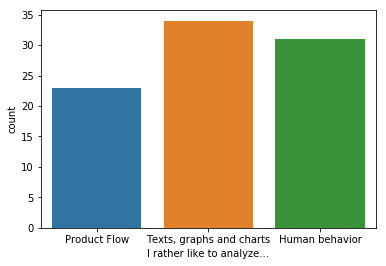

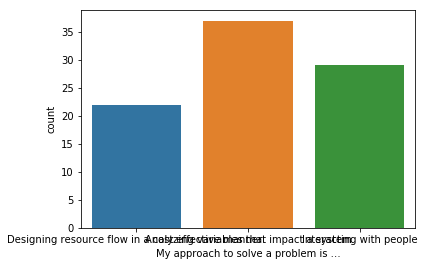

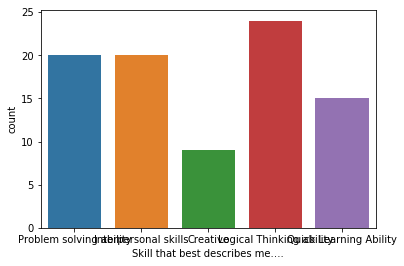

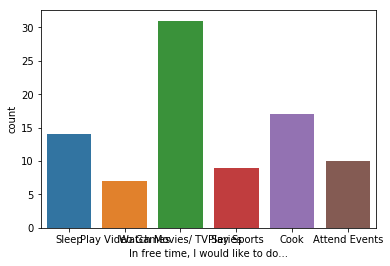

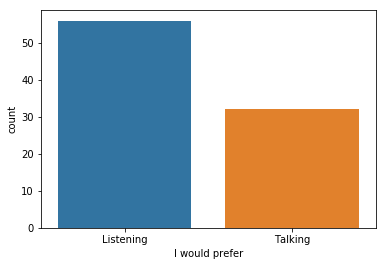

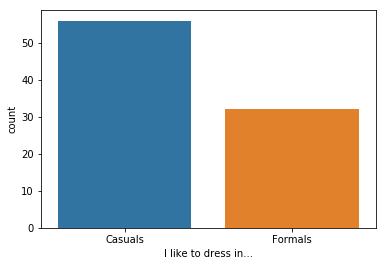

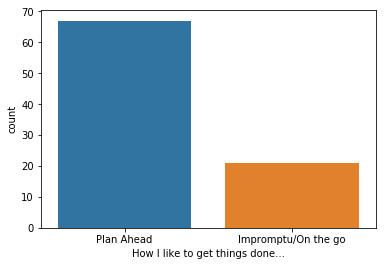

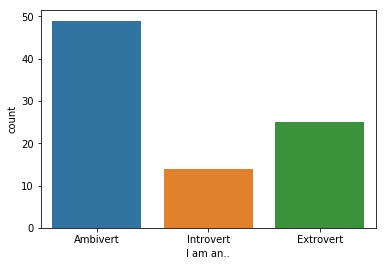

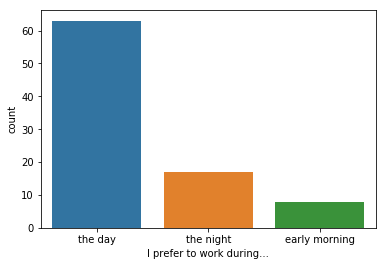

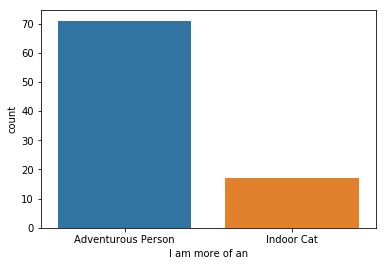

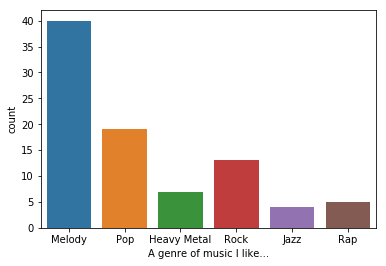

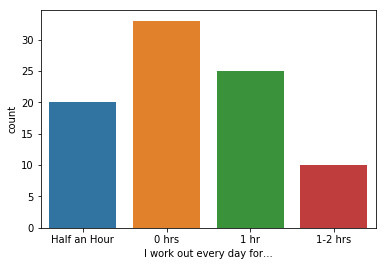

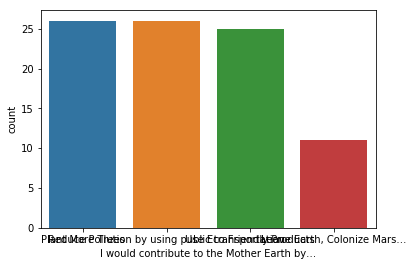

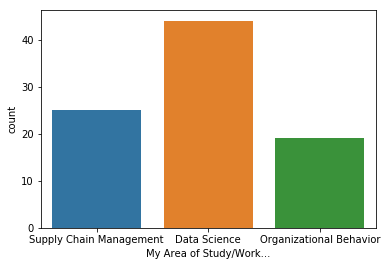

C:\Users\sushma\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0.24696304 0.23023144 0.09507112 0.04730428 0.07551686 0.04424551
 0.02028864 0.06802758 0.03589704 0.00750733 0.03876887 0.04038348
 0.04979481]
Feature importance Score with Forest of Trees
I rather like to analyze... : 0.2469630378334963
My approach to solve a problem is … : 0.2302314423612128
Skill that best describes me…. : 0.09507111655386062
In free time, I would like to do... : 0.04730427639979096
I would prefer : 0.07551686173209528
I like to dress in...﻿ : 0.04424551268041706
How I like to get things done... : 0.020288644925294745
I am an.. : 0.06802757544567396
I prefer to work during... : 0.03589704155661856
I am more of an : 0.007507329616373703
A genre of music I like... : 0.03876886568974095
I work out every day for... : 0.04038348286602441
I would contribute to the Mother Earth by… : 0.049794812339400536


C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


I rather like to analyze...
My approach to solve a problem is …
Skill that best describes me….
I would prefer
I am an..


In [35]:
# Features list
features = ['I rather like to analyze...','My approach to solve a problem is …','Skill that best describes me….','In free time, I would like to do...',
            'I would prefer','I like to dress in...﻿','How I like to get things done...','I am an..','I prefer to work during...','I am more of an',
            'A genre of music I like...','I work out every day for...','I would contribute to the Mother Earth by…','My Area of Study/Work...']

# BAR CHART # DATA VISUALIZATION
for k in features:
    sns.countplot(dataset[k], data=dataset)
    plt.show()

global_index = []
new_data = pd.DataFrame()
encoders = []

# integer encoding for each column
for feature in features:
    values = array(dataset[feature])
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    #Adding integer encoded columns to new data frame
    new_data[feature] = integer_encoded[:,0]
    #saving each column encoders in a list
    encoders.append(label_encoder)

# Class Varible
CV =  new_data['My Area of Study/Work...'].values.reshape((len(new_data['My Area of Study/Work...']), 1))
# All Exploratory Variables(Features)
data = new_data.loc[:,features[0:-1]].values.reshape((len(new_data['My Area of Study/Work...']), (len(features) - 1)))

# Feature importance using Forests of Trees
model = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1 )
model.fit(data,CV)
print(model.feature_importances_)
print('Feature importance Score with Forest of Trees')
for i in range(0,len(features) - 1):
    print(features.__getitem__(i) + ' : ' + str(model.feature_importances_[i]))
sfm = SelectFromModel(model, threshold=0.05)
sfm.fit(data, CV)
for feature_list_index in sfm.get_support(indices=True):
    print(features.__getitem__(feature_list_index))    




In [36]:
# Selected features based on importance of features using random forests
features= ['I rather like to analyze...','My approach to solve a problem is …','Skill that best describes me….','In free time, I would like to do...'
,'I am an..','I prefer to work during...','I would prefer','I like to dress in...﻿','How I like to get things done...','I would contribute to the Mother Earth by…','My Area of Study/Work...']

CV =  new_data['My Area of Study/Work...'].values.reshape((len(new_data['My Area of Study/Work...']), 1))
# Exploratory Variables(Features)
data = new_data.loc[:,features[0:-1]].values.reshape((len(new_data['My Area of Study/Work...']), (len(features) - 1)))

# Gaussian Naive Bayes model 
NB = GaussianNB()
# Train the model using the training sets
NB.fit(data, CV)


print("Probability of the classes: ", NB.class_prior_)
print("Mean of each feature per class:\n", NB.theta_)
print("Variance of each feature per class:\n", NB.sigma_)

#predict the class for each data point
predicted = NB.predict(data)
print("Predictions:\n",np.array([predicted]).T)

# predict the probability/likelihood of the prediction
prob_of_pred = NB.predict_proba(data)
print("Probability of each class for the prediction: \n",prob_of_pred)
print("Accuracy of the model: ",NB.score(data,CV))
NB_conf_matrix = confusion_matrix(CV,predicted )
print(NB_conf_matrix)

# Calculating 5 fold cross validation results
model = GaussianNB()
kf = KFold(len(CV), n_folds=10)
scores = cross_val_score(model, data, CV, cv=kf)
print("MSE of every fold in 10 fold cross validation: ", abs(scores))
print("Mean of the 10 fold cross-validation: %0.2f" % abs(scores.mean()))




Probability of the classes:  [0.5        0.21590909 0.28409091]
Mean of each feature per class:
 [[1.54545455 0.45454545 2.5        3.5        0.56818182 1.22727273
  0.25       0.20454545 0.79545455 1.65909091]
 [0.         1.78947368 0.78947368 2.31578947 0.84210526 1.
  0.89473684 0.84210526 0.52631579 1.84210526]
 [0.92       1.04       2.52       2.76       0.48       0.96
  0.16       0.28       0.88       1.8       ]]
Variance of each feature per class:
 [[6.57024797e-01 7.02479342e-01 1.11363637e+00 3.29545455e+00
  7.45351243e-01 4.02892565e-01 1.87500003e-01 1.62706615e-01
  1.62706615e-01 1.04287190e+00]
 [3.46474690e-09 3.76731305e-01 3.76731305e-01 3.79501385e+00
  1.32963992e-01 3.46474690e-09 9.41828289e-02 1.32963992e-01
  2.49307483e-01 9.75069256e-01]
 [1.53600003e-01 1.18400003e-01 1.36960000e+00 2.66240000e+00
  4.89600003e-01 1.98400003e-01 1.34400003e-01 2.01600003e-01
  1.05600003e-01 9.60000003e-01]]
Predictions:
 [[2]
 [0]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2

C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [37]:
#Decision Tree Model
dt = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=4)
dt.fit(data,CV)
dt_predict = dt.predict(data)
dt_predict_prob = dt.predict_proba(data)

#Confusion Matrix and Accuracy Score
dt_conf_matrix = confusion_matrix(CV, dt_predict)
dt_accuracy_score = accuracy_score(CV, dt_predict)
print(dt_conf_matrix)
print(dt_accuracy_score)

# Calculating 5 fold cross validation results
dt = DecisionTreeClassifier()
kf = KFold(len(CV), n_folds=10)
scores = cross_val_score(dt, data, CV, cv=kf)
print("MSE of every fold in 10 fold cross validation: ", abs(scores))
print("Mean of the 10 fold cross-validation: %0.2f" % abs(scores.mean()))



[[41  0  3]
 [ 4 15  0]
 [ 1  0 24]]
0.9090909090909091
MSE of every fold in 10 fold cross validation:  [0.77777778 1.         0.88888889 0.77777778 1.         0.55555556
 0.88888889 0.44444444 0.375      0.875     ]
Mean of the 10 fold cross-validation: 0.76


In [38]:
# Random forest
# Create a new random forest classifier for the most important features
model_important = RandomForestClassifier(min_samples_leaf=2)
# Train the new classifier on the new dataset containing the most important features
model_important.fit(data, CV)

#predict the class for each data point
predicted = model_important.predict(data)
print("Predictions:\n",np.array([predicted]).T)

# predict the probability/likelihood of the prediction
prob_of_pred = model_important.predict_proba(data)
print("Probability of each class for the prediction: \n",prob_of_pred)
rf_accuracy_score = accuracy_score(CV, predicted)
print("Accuracy of RF with selected features is ",rf_accuracy_score)

# Calculating 5 fold cross validation results
model = RandomForestClassifier( )
kf = KFold(len(CV), n_folds=10)
scores = cross_val_score(model, data, CV, cv=kf)
print("MSE of every fold in 10 fold cross validation: ", abs(scores))
print("Mean of the 10 fold cross-validation: %0.2f" % abs(scores.mean()))



C:\Users\sushma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), fo

Predictions:
 [[2]
 [0]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [2]
 [2]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [1]
 [1]
 [0]
 [2]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [2]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [2]
 [1]
 [2]
 [0]
 [1]
 [0]
 [0]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]]
Probability of each class for the prediction: 
 [[0.         0.         1.        ]
 [0.875      0.09166667 0.03333333]
 [0.43333333 0.51666667 0.05      ]
 [0.96666667 0.         0.03333333]
 [0.18333333 0.06666667 0.75      ]
 [0.15       0.         0.85      ]
 [0.05       0.01666667 0.93333333]
 [0.88       0.         0.12      ]
 [0.05       0.87662338 0.07337662]
 [0.1        0.         0.9       ]
 [0.9        0.         0.1       ]
 [0.08333333 0.80995671 0.10670996]
 [0.01666667 0.98333333 0.        ]
 [0.95       0.05       0.   

C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

MSE of every fold in 10 fold cross validation:  [0.88888889 1.         0.88888889 0.66666667 1.         0.66666667
 0.88888889 0.88888889 0.75       0.875     ]
Mean of the 10 fold cross-validation: 0.85


C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [39]:
dist = pd.read_csv("distupdate1.csv")

features10= ['points.1','points.2','My.Area.of.Study.Work...'] 
# Class variable
CV10 =  dist['My.Area.of.Study.Work...'].values.reshape((len(dist['My.Area.of.Study.Work...']), 1))
# Exploratory Variables(Features)
data10 = dist.loc[:,features10[0:-1]].values.reshape((len(dist['My.Area.of.Study.Work...']), (len(features10) - 1)))


# Create a KNN object
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
KNN = KNeighborsClassifier(n_neighbors=10)


# Train the model using the training sets
KNN.fit(data10, CV10)


#predict the class for each data point
predicted = KNN.predict(data10)
print("Predictions: \n", np.array([predicted]).T)


# predict the probability/likelihood of the prediction
print("Probability of prediction: \n",KNN.predict_proba(data10))
print("Neighbors and their Distance: \n",KNN.kneighbors(data10, return_distance=True))
print("Accuracy score for the model: \n", KNN.score(data10,CV10))
print(metrics.confusion_matrix(CV10, predicted))


# Calculating 10 fold cross validation results
model = KNeighborsClassifier()
# kf = KFold(len(CV), n_folds=10)
kf = KFold(n_splits=10)
scores = cross_val_score(model, data10, CV10, cv=kf)
print("Accuracy of every fold in 10 fold cross validation: ", abs(scores))
print("Mean of the 10 fold cross-validation: %0.2f" % abs(scores.mean()))


Predictions: 
 [['Supply Chain Management']
 ['Data Science']
 ['Organizational Behavior']
 ['Data Science']
 ['Supply Chain Management']
 ['Supply Chain Management']
 ['Supply Chain Management']
 ['Data Science']
 ['Organizational Behavior']
 ['Supply Chain Management']
 ['Data Science']
 ['Organizational Behavior']
 ['Organizational Behavior']
 ['Data Science']
 ['Data Science']
 ['Organizational Behavior']
 ['Supply Chain Management']
 ['Supply Chain Management']
 ['Supply Chain Management']
 ['Organizational Behavior']
 ['Data Science']
 ['Supply Chain Management']
 ['Supply Chain Management']
 ['Organizational Behavior']
 ['Data Science']
 ['Data Science']
 ['Supply Chain Management']
 ['Data Science']
 ['Data Science']
 ['Data Science']
 ['Data Science']
 ['Data Science']
 ['Data Science']
 ['Data Science']
 ['Data Science']
 ['Data Science']
 ['Data Science']
 ['Supply Chain Management']
 ['Organizational Behavior']
 ['Organizational Behavior']
 ['Data Science']
 ['Supply Chain 

C:\Users\sushma\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sushma\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh